# Quick report
Ließt Daten, die ähnlich der Datei *valuesncprogram.json* vorliegen, in ein Pandas-Dataframe ein. demo von *pandas_profiling*, das einen report über das eingegebene DataFrame ausgibt.

## TODO
* _values.json_ enthält größere verschachtelte objekte. Wie wichtig sind diese für unseren Machine Learning-Prozess?
* Generell abklären: welche daten werden tatsächlich benötigt? reduzieren der Daten auf die wichtigsten Spalten

In [41]:
import pandas as pd
# import pandas_profiling

def readMachineJSON(path, dataLike="valuesncprogram"):
    df = pd.read_json(filename,orient="records", lines=True)
    if dataLike == "valuesncprogram":
        df["_id"] = df["_id"].apply(lambda x: x["$oid"])
        df["timeStamp"] = df["timeStamp"].apply(lambda x: pd.to_datetime(x["$date"]))
        df["timeStamp"] = pd.to_datetime(df["timeStamp"])
    elif dataLike == "values":
        df["_id"] = df["_id"].apply(lambda x: x["$oid"])
       #todo machineStatusList auspacken: [{"_id":"SENSORDATA.12430012063.Channel1.Common_Machine_Data.Status_Signal_Lamp.STATUS","ValueUnit":"","Value":"false","Timestamp":{"$date":"2019-08-02T09:11:34.489Z"},"StatusId":"Signal_Lamp_RED","StatusType":"RED"},{"_id":"SENSORDATA.12430012063.Channel1.Common_Machine_Data.Status_Signal_Lamp.STATUS","ValueUnit":"","Value":"false","Timestamp":{"$date":"2019-08-02T09:11:34.534Z"},"StatusId":"Signal_Lamp_YELLOW","StatusType":"YELLOW"}]
    return df

In [5]:
# filename = "valuesncprogram.json"
# df = readMachineJSON(filename)
# print(df.shape)
# print(df.dtypes)

In [6]:
import pandas as pd
# import pandas_profiling

df = pd.read_json("dmg_values.json",orient="records", lines=True)
    #todo machineStatusList auspacken: [{"_id":"SENSORDATA.12430012063.Channel1.Common_Machine_Data.Status_Signal_Lamp.STATUS","ValueUnit":"","Value":"false","Timestamp":{"$date":"2019-08-02T09:11:34.489Z"},"StatusId":"Signal_Lamp_RED","StatusType":"RED"},{"_id":"SENSORDATA.12430012063.Channel1.Common_Machine_Data.Status_Signal_Lamp.STATUS","ValueUnit":"","Value":"false","Timestamp":{"$date":"2019-08-02T09:11:34.534Z"},"StatusId":"Signal_Lamp_YELLOW","StatusType":"YELLOW"}]

In [7]:
# Umwandlung des diffusen Datentyps in einen eindeutigen

df["_id"] = df["_id"].apply(lambda x: x["$oid"])
df["timeStamp"] = df["timeStamp"].apply(lambda x: x["$date"]).apply(lambda x: x["$numberLong"])
df["valueStatus"] = df["valueStatus"].apply(lambda x: x["$numberInt"])
df["value_number"] = df["value_number"].apply(lambda x: list(x.values())[0])
df["timeStampMqttClient"] = df["timeStampMqttClient"].apply(lambda x: x["$date"]).apply(lambda x: x["$numberLong"])

In [8]:
df.head(50)

,_id,value,valueStatus,Error,statusTyp,statusID,ValueID,machineID,channelId,ValueUnit,statusIsMachine,timeStamp,machineStatusList,value_number,componentID,timeStampMqttClient
0,5dc516968e15b329dc1341f3,0.00,0,0,GREEN,0,12430012063.Main_Spindle.Actual_Power,12430012063,Channel1,%,False,1573197461887,NaN,0,12430012063.Main_Spindle,1573197437715
1,5dc516968e15b329dc1341f1,0.00,0,0,GREEN,0,12430012063.Main_Spindle.Actual_Speed_Rate,12430012063,Channel1,RPM,False,1573197461887,NaN,0,12430012063.Main_Spindle,1573197437717
2,5dc516968e15b329dc1341f2,360.00,0,0,GREEN,0,12430012063.Main_Spindle.Actual_Position_MCS,12430012063,Channel1,Grad,False,1573197461888,NaN,360,12430012063.Main_Spindle,1573197437728
3,5dc516968e15b329dc1341f5,0.00,0,0,GREEN,0,12430012063.Main_Spindle.MPC_Veff_Total,12430012063,Channel1,mm/s,False,1573197461890,NaN,0,12430012063.Main_Spindle,1573197437715
4,5dc516968e15b329dc1341ec,0.00,0,0,GREEN,0,12430012063.C1_Axis.Actual_Power,12430012063,Channel1,%,False,1573197461891,NaN,0,12430012063.C1_Axis,1573197437715
5,5dc516968e15b329dc1341f0,0.00,0,0,GREEN,0,12430012063.A1_Axis.Actual_Power,12430012063,Channel1,%,False,1573197461892,NaN,0,12430012063.A1_Axis,1573197437673
6,5dc516968e15b329dc1341ed,0.00,0,0,GREEN,0,12430012063.X1_Axis.Actual_Power,12430012063,Channel1,%,False,1573197461894,NaN,0,12430012063.X1_Axis,1573197437673
7,5dc516968e15b329dc1341ee,0.00,0,0,GREEN,0,12430012063.Y1_Axis.Actual_Power,12430012063,Channel1,%,False,1573197461895,NaN,0,12430012063.Y1_Axis,1573197437728
8,5dc516968e15b329dc1341ef,0.00,0,0,GREEN,0,12430012063.Z1_Axis.Actual_Power,12430012063,Channel1,%,False,1573197461897,NaN,0,12430012063.Z1_Axis,1573197437722
9,5dc5167e8e15b329dc13412e,20.06,0,0,GREEN,0,12430012063.Main_Spindle.Temperature_Spindle,12430012063,Channel1,Grad,False,1573197462787,NaN,20.06,12430012063.Main_Spindle,1573197438373


In [9]:
df_csv1 = pd.read_csv("test_data_set_1.csv", header=6)
df_csv1.head()

,Zeitstempel,NC-Programm,Werkzeug,MPC Lager [mG],MPC Spitze [%],MPC Veff Gesamt [mm/s],Axialkraft Druck [kN],Axialkraft Zug [kN],Biegemoment Werkzeug [Nm]
0,2019.11.14 14:20:00.086,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.2,2
1,2019.11.14 14:20:00.548,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.3,2
2,2019.11.14 14:20:01.456,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.2,2
3,2019.11.14 14:20:02.080,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.3,2
4,2019.11.14 14:20:06.011,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.4,2


In [10]:
df_csv2 = pd.read_csv("test_data_set_2.csv", header=6)
df_csv2.head()

,Zeitstempel,NC-Programm,Werkzeug,Power Spindle1 [W],Power X1 [W],Power Y1 [W],Power Z1 [W],Aktuelle Spindeldrehzahl [RPM],Spindeltemperatur [Grad]
0,2019.11.14 14:20:18.596,EINZELLOCH.MPF,MESSTASTER,0.0,0.0,0.0,151.072,0,27.37
1,2019.11.14 14:20:18.659,EINZELLOCH.MPF,MESSTASTER,0.0,0.0,0.0,147.341,0,27.37
2,2019.11.14 14:20:18.770,EINZELLOCH.MPF,MESSTASTER,0.0,0.0,0.0,143.611,0,27.37
3,2019.11.14 14:20:18.848,EINZELLOCH.MPF,MESSTASTER,0.0,0.0,0.0,143.611,0,27.37
4,2019.11.14 14:20:18.902,EINZELLOCH.MPF,MESSTASTER,0.0,0.0,0.0,147.341,0,27.37


In [11]:
df_csv3 = pd.read_csv("test_data_set_xy.csv", header=6)
df_csv3.head()

,Zeitstempel,NC-Programm,Werkzeug,Aktueller Vorschub [mm/min],Aktuelle Position MCS [mm],Aktuelle Leistung [%],Aktueller Vorschub [mm/min].1,Aktuelle Position MCS [mm].1,Aktuelle Leistung [%].1
0,2019.11.14 14:20:18.900,EINZELLOCH.MPF,MESSTASTER,0,351.75,0,0,-378.57,1
1,2019.11.14 14:20:19.266,EINZELLOCH.MPF,MESSTASTER,0,351.75,0,0,-378.57,2
2,2019.11.14 14:20:19.577,EINZELLOCH.MPF,MESSTASTER,0,351.75,0,346,-378.57,2
3,2019.11.14 14:20:19.589,EINZELLOCH.MPF,MESSTASTER,0,351.75,0,346,-378.53,2
4,2019.11.14 14:20:19.592,EINZELLOCH.MPF,MESSTASTER,0,351.75,0,346,-378.53,7


In [12]:
df_csv4 = pd.read_csv("test_data_set_z.csv", header=6)
df_csv4.head()

,Zeitstempel,NC-Programm,Werkzeug,Aktueller Vorschub [mm/min],Aktuelle Position MCS [mm],Aktuelle Leistung [%]
0,2019.11.14 14:20:18.148,EINZELLOCH.MPF,MESSTASTER,0,-313.74,14
1,2019.11.14 14:20:18.540,EINZELLOCH.MPF,MESSTASTER,0,-312.95,14
2,2019.11.14 14:20:18.541,EINZELLOCH.MPF,MESSTASTER,1812,-312.95,14
3,2019.11.14 14:20:18.544,EINZELLOCH.MPF,MESSTASTER,1812,-312.95,25
4,2019.11.14 14:20:18.753,EINZELLOCH.MPF,MESSTASTER,1812,-306.30,25


In [13]:
import csv

df_csv5 = pd.read_csv("MEAS_PROTOCOL_CSV_6.CSV", sep=';')
df_csv5.rename(columns=lambda x: x.strip(), inplace=True)
df_csv5["Measured"] = df_csv5["Measured"].apply(lambda x: float(str(x).replace(',','.')))
df_csv5["Setpoint"] = df_csv5["Setpoint"].apply(lambda x: float(str(x).replace(',','.')))
df_csv5["Difference"] = df_csv5["Difference"].apply(lambda x: float(str(x).replace(',','.')))
columnsToStrip = ["Program", "Plane", "Measuring variant","Results:", "Unit"]
for curColumn in columnsToStrip:
    df_csv5[curColumn] = df_csv5[curColumn].apply(lambda x: x.strip())
df_csv5.head()

,Unnamed: 0,Date,Time,Program,Workpiece no.,Testpoint,Plane,Probe no.,Cycle,S_MVAR,Measuring variant,Results:,Setpoint,Measured,Difference,Unit
0,1.0,14.11.2019,15:53:15,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,X,15.000,14.999,-0.001,mm
1,NaN,14.11.2019,15:53:15,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,Y,15.000,14.996,-0.004,mm
2,NaN,14.11.2019,15:53:15,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,Diameter,12.014,12.019,0.005,mm
3,2.0,14.11.2019,15:53:20,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,X,30.000,29.999,-0.001,mm
4,NaN,14.11.2019,15:53:20,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,Y,15.000,14.998,-0.002,mm


In [14]:
df_csv5 = pd.read_csv("Achsleistung-2019-11-14T14-24-47.csv", sep=';')
df_csv5.head()

,Timestamp,X1,Y1,Z1,C1,A1,SPI1,WZM,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,"2019-11-14T14:24:47,176",83.473,110.304,3452.503,1217.848,1189.304,554.121,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"2019-11-14T14:24:47,188",83.473,110.304,3452.503,1217.848,1189.304,554.121,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"2019-11-14T14:24:47,189",79.921,93.876,3450.010,1211.505,1186.133,1682.152,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"2019-11-14T14:24:47,190",81.697,103.263,3452.503,1208.333,1186.133,1517.235,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"2019-11-14T14:24:47,192",81.697,103.263,3452.503,1208.333,1186.133,1517.235,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
!pip install matplotlib

In [16]:
dfX = df.loc[lambda x: x["ValueID"]=="12430012063.X1_Axis.Actual_Position_MCS", ["ValueID", "value", "timeStamp"]]
dfX.head(10)

,ValueID,value,timeStamp
12,12430012063.X1_Axis.Actual_Position_MCS,1.56,1573197462948
392,12430012063.X1_Axis.Actual_Position_MCS,1.55,1573197509018
400,12430012063.X1_Axis.Actual_Position_MCS,1.56,1573197509825
407,12430012063.X1_Axis.Actual_Position_MCS,1.55,1573197510667
746,12430012063.X1_Axis.Actual_Position_MCS,36.11,1573197720951
767,12430012063.X1_Axis.Actual_Position_MCS,116.11,1573197721123
782,12430012063.X1_Axis.Actual_Position_MCS,196.11,1573197721289
798,12430012063.X1_Axis.Actual_Position_MCS,276.11,1573197721491
814,12430012063.X1_Axis.Actual_Position_MCS,356.11,1573197721686
828,12430012063.X1_Axis.Actual_Position_MCS,436.11,1573197721891


In [17]:
dfY = df.loc[lambda x: x["ValueID"]=="12430012063.Y1_Axis.Actual_Position_MCS", ["ValueID", "value", "timeStamp"]]
dfY.head(10)

,ValueID,value,timeStamp
749,12430012063.Y1_Axis.Actual_Position_MCS,-617.85,1573197720954
770,12430012063.Y1_Axis.Actual_Position_MCS,-546.62,1573197721145
784,12430012063.Y1_Axis.Actual_Position_MCS,-475.38,1573197721291
800,12430012063.Y1_Axis.Actual_Position_MCS,-404.15,1573197721493
816,12430012063.Y1_Axis.Actual_Position_MCS,-332.92,1573197721687
829,12430012063.Y1_Axis.Actual_Position_MCS,-261.68,1573197721892
843,12430012063.Y1_Axis.Actual_Position_MCS,-190.45,1573197722113
859,12430012063.Y1_Axis.Actual_Position_MCS,-119.22,1573197722330
872,12430012063.Y1_Axis.Actual_Position_MCS,-47.99,1573197722496
894,12430012063.Y1_Axis.Actual_Position_MCS,-0.16,1573197722697


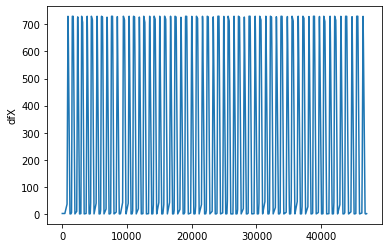

In [19]:
import matplotlib.pyplot as plt

plt.plot(dfX["value"]) 
# plt.plot(dfY)
plt.ylabel('dfX')
plt.show()

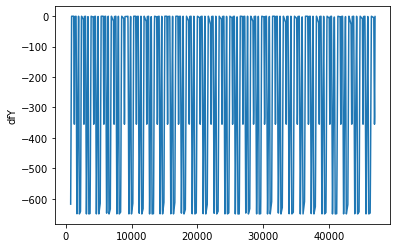

In [20]:
plt.plot(dfY["value"])
plt.ylabel('dfY')
plt.show()

<class 'pandas.core.series.Series'>


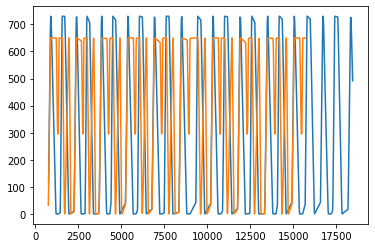

In [21]:
print(type(dfX["value"]))

fig, ax = plt.subplots()
ax.plot(dfX["value"][5:805]) 
ax.plot(dfY["value"][:800] - min(dfY["value"][:800]))
plt.show()

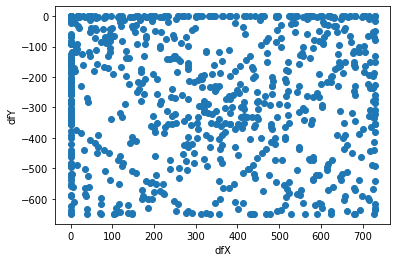

In [22]:
plt.scatter(dfX["value"][5:805], dfY["value"][:800])
plt.xlabel('dfX')
plt.ylabel('dfY')
plt.show()

In [23]:
def matching_over_timestamps(dataframeX, dataframeY, toleranz):
    df = pd.DataFrame([], [], columns=list('XY'))
    
    indices_x = list(range(len(dataframeX)))
    indices_y = list(range(len(dataframeY)))
    
    # reset indices of dataframes
    dataframeX = dataframeX.reset_index(drop=True)
    dataframeY = dataframeY.reset_index(drop=True)
    
    # print(dataframeX["timeStamp"][0], dataframeY["timeStamp"])
    
    for idx_dfX in range(len(dataframeX)):
        for idx_dfY in range(len(dataframeY)):
            
            diff = abs(int(dataframeX["timeStamp"][idx_dfX]) - int(dataframeY["timeStamp"][idx_dfY]))
            
            if (diff <= toleranz):
                df_append = pd.DataFrame([[dataframeX["value"][idx_dfX], dataframeY["value"][idx_dfY]]], columns=list('XY'))
                # df = df.append({'X': dataframeX["value"][idx_dfX]}, ignore_index=True)
                # df = df.append({'Y': dataframeY["value"][idx_dfY]}, ignore_index=True)
                df = df.append(df_append, ignore_index=True)
                
    print(df)
    return df    

In [24]:
timematching = matching_over_timestamps(dfX, dfY, 200)

           X       Y
0      36.11 -617.85
1      36.11 -546.62
2     116.11 -617.85
3     116.11 -546.62
4     116.11 -475.38
...      ...     ...
2766    0.52 -170.07
2767    0.75  -90.07
2768    0.97  -90.07
2769    0.97  -12.12
2770    1.00   -1.00

[2771 rows x 2 columns]


In [25]:
print(timematching)

           X       Y
0      36.11 -617.85
1      36.11 -546.62
2     116.11 -617.85
3     116.11 -546.62
4     116.11 -475.38
...      ...     ...
2766    0.52 -170.07
2767    0.75  -90.07
2768    0.97  -90.07
2769    0.97  -12.12
2770    1.00   -1.00

[2771 rows x 2 columns]


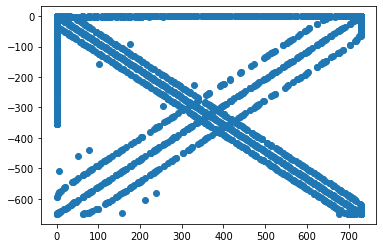

In [26]:
plt.scatter(timematching["X"], timematching["Y"])
plt.show()

In [27]:
df = pd.read_csv("2019-11-26_export.csv", encoding="utf-8")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
print(df.dtypes)
print(df.shape)
print(df.iloc[131167])

_id                  object
ValueID              object
value               float64
timeStamp    datetime64[ns]
dtype: object
(131168, 4)
_id                                   5ddd25148e15b3086c07bed5
ValueID      12430012063.Tool_Control_Center.Axial_Force_Co...
value                                                        0
timeStamp                           2019-11-26 13:15:16.601000
Name: 131167, dtype: object


In [28]:
df["ValueID"].value_counts()

12430012063.Main_Spindle.Actual_Position_MCS                    14288
12430012063.Energy_Savings.Active_Power_Spindle1                12396
12430012063.Z1_Axis.Actual_Position_MCS                         11145
12430012063.Tool_Control_Center.Symmetry                         8173
12430012063.Z1_Axis.Actual_Power                                 8024
12430012063.Main_Spindle.Actual_Power                            7700
12430012063.Energy_Savings.Active_Power_Z1                       5724
12430012063.Y1_Axis.Actual_Power                                 5167
12430012063.X1_Axis.Actual_Power                                 4690
12430012063.Tool_Control_Center.Axial_Force_Tension              4643
12430012063.Z1_Axis.Actual_Feed_Rate                             4465
12430012063.X1_Axis.Actual_Position_MCS                          4453
12430012063.Main_Spindle.Actual_Speed_Rate                       4409
12430012063.Y1_Axis.Actual_Position_MCS                          3861
12430012063.X1_Axis.

In [29]:
def plotSpecificIDs(idList):
    tsStart = datetime(2019,11,26,12,0)
    tsEnd = datetime(2019,11,26,23,35)
    plt.figure(figsize=(15, 5), dpi=80)
    plt.plot(df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "timeStamp"],df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp']) & (l['timeStamp'] < tsEnd), 'value'], c='r')
    for id in idList:
        plt.scatter(df.loc[lambda l: (l['ValueID']==id) & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "timeStamp"],df.loc[lambda l: (l['ValueID']==id) & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "value"], s=1)
    plt.legend(["12430012063.Z1_Axis.Actual_Position_MCS"]+idList)
    plt.show()

/home/bueddi/snap/jupyter/common/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 1200x400 with 0 Axes>

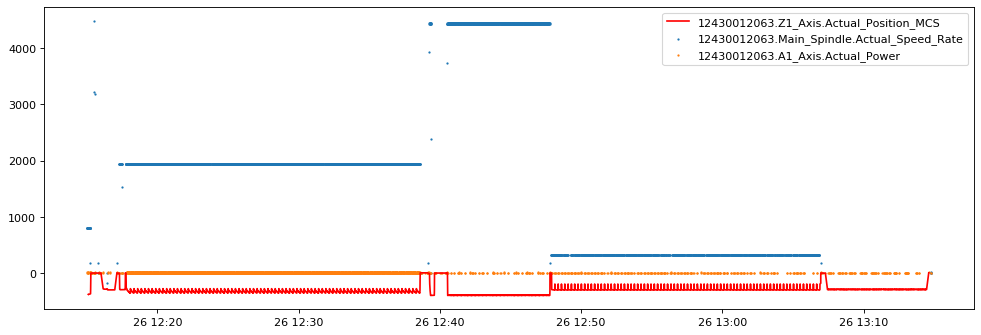

In [30]:
from datetime import datetime, timedelta

tsStart = datetime(2019,11,26,12,0)
tsEnd = datetime(2019,11,26,23,35)
plt.figure(figsize=(15, 5), dpi=80)

toPlot = ["12430012063.Main_Spindle.Actual_Speed_Rate","12430012063.A1_Axis.Actual_Power"]

plotSpecificIDs(toPlot)

In [31]:
df.loc[lambda l: l['ValueID']=="12430012063.Maintenance_Package.Tool_Changer_Main"]

,_id,ValueID,value,timeStamp
575,5ddd17038e15b3086c052b2c,12430012063.Maintenance_Package.Tool_Changer_Main,4997804.0,2019-11-26 12:15:16.454
777,5ddd170f8e15b3086c052c16,12430012063.Maintenance_Package.Tool_Changer_Main,4997803.0,2019-11-26 12:15:27.886
1095,5ddd17258e15b3086c052d7b,12430012063.Maintenance_Package.Tool_Changer_Main,4997802.0,2019-11-26 12:15:50.136
2249,5ddd17758e15b3086c05326e,12430012063.Maintenance_Package.Tool_Changer_Main,4997801.0,2019-11-26 12:17:10.026
2250,5ddd1a3b8e15b3086c05c3f6,12430012063.Maintenance_Package.Tool_Changer_Main,4997801.0,2019-11-26 12:17:10.026
2251,5ddd1c938e15b3086c063b72,12430012063.Maintenance_Package.Tool_Changer_Main,4997801.0,2019-11-26 12:17:10.026
54849,5ddd1c9c8e15b3086c063bcf,12430012063.Maintenance_Package.Tool_Changer_Main,4997800.0,2019-11-26 12:39:09.262
55439,5ddd1cb88e15b3086c063ea0,12430012063.Maintenance_Package.Tool_Changer_Main,4997799.0,2019-11-26 12:39:37.075
55622,5ddd1cc58e15b3086c063f6b,12430012063.Maintenance_Package.Tool_Changer_Main,4997798.0,2019-11-26 12:39:49.774
81271,5ddd1ea28e15b3086c06b044,12430012063.Maintenance_Package.Tool_Changer_Main,4997797.0,2019-11-26 12:47:47.338


(52591, 4)


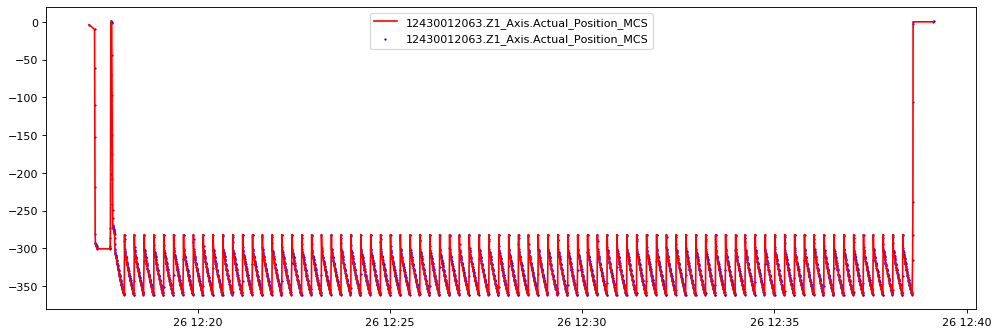

In [32]:
dtStartEbene1 = datetime(2019,11,26,12,17,10)
dtEndEbene1 = datetime(2019,11,26,12,39,9)
dfAllEbene1 = df.loc[lambda l: (dtStartEbene1 < l["timeStamp"]) & (l["timeStamp"] < dtEndEbene1)]

print(dfAllEbene1.shape)
def plotActualZ1(df):
    plt.figure(figsize=(15, 5), dpi=80)
    plt.plot(df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "timeStamp"],df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp']) & (l['timeStamp'] < tsEnd), 'value'], c='r')
    plt.scatter(df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "timeStamp"],df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp']) & (l['timeStamp'] < tsEnd), 'value'], c='b',s=1.0)
    plt.legend(["12430012063.Z1_Axis.Actual_Position_MCS","12430012063.Z1_Axis.Actual_Position_MCS"])
    plt.show()

plotActualZ1(dfAllEbene1)

min: -366.64, max: -276.64


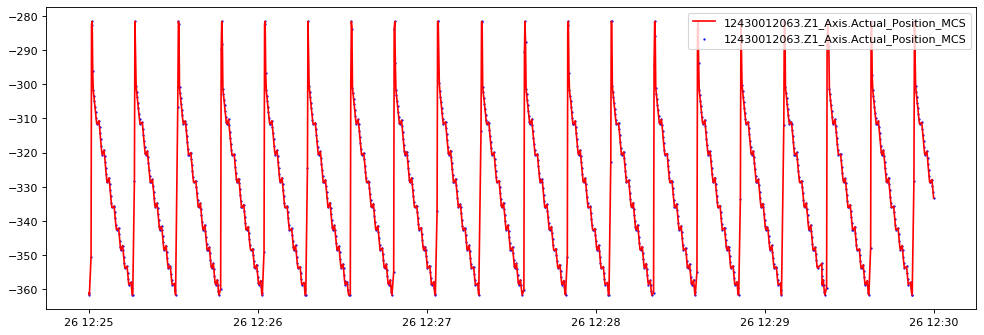

In [33]:
valueID_Z1 = "12430012063.Z1_Axis.Actual_Position_MCS"
startSample = datetime(2019,11,26,12,25)
endSample = datetime(2019,11,26,12,30)
tolerance = 5

dfFindRange = dfAllEbene1.loc[lambda l: (l["ValueID"] == valueID_Z1) & (startSample < l["timeStamp"]) & (l["timeStamp"] < endSample)] # gröbste angabe eines bereichs, nur, um min und max festzulegen
minAllowedValue = dfFindRange.loc[:,"value"].min()-tolerance
maxAllowedValue = dfFindRange.loc[:,"value"].max()+tolerance
print("min: "+str(minAllowedValue)+", max: "+str(maxAllowedValue))

plotActualZ1(dfFindRange)

In [34]:
import copy

def approxRange(dfParent,start,end,minValue,maxValue,deltaTime):
    valueID_Z1 = "12430012063.Z1_Axis.Actual_Position_MCS"
    newStart = copy.deepcopy(start)
    newEnd = copy.deepcopy(end)
    tempDF = dfParent.loc[lambda d: (d["ValueID"] == valueID_Z1) & (start < d["timeStamp"]) & (d["timeStamp"] < end)]
    
    #approx. start of frame
    runAtLeastOnce = False
    while minValue < tempDF.loc[:,"value"].min() and tempDF.loc[:,"value"].max() < maxValue:
        newStart = newStart - deltaTime
        tempDF = dfParent.loc[lambda l: (l["ValueID"] == valueID_Z1) & (newStart < l["timeStamp"]) & (l["timeStamp"] < newEnd)]
        runAtLeastOnce = True
    
    if runAtLeastOnce:
        newStart = newStart + deltaTime
    tempDF = dfParent.loc[lambda l: (l["ValueID"] == valueID_Z1) & (newStart < l["timeStamp"]) & (l["timeStamp"] < newEnd)]
    
    #approx. end of frame
    runAtLeastOnce = False
    while minValue < tempDF.loc[:,"value"].min() and tempDF.loc[:,"value"].max() < maxValue:
        newEnd = newEnd + deltaTime
        tempDF = dfParent.loc[lambda l: (l["ValueID"] == valueID_Z1) & (newStart < l["timeStamp"]) & (l["timeStamp"] < newEnd)]
        runAtLeastOnce = True
    
    if runAtLeastOnce:
        newEnd = newEnd - deltaTime
    
    return newStart, newEnd

def approxRangeInSteps(dfParent,initialStart,initialEnd,deltaTimes,sampleTolerance=5):
    start = initialStart
    end = initialEnd
    tempDF = dfParent.loc[lambda d: (d["ValueID"] == valueID_Z1) & (start < d["timeStamp"]) & (d["timeStamp"] < end)]
    minValue = tempDF.loc[:,"value"].min() - sampleTolerance
    maxValue = tempDF.loc[:,"value"].max() + sampleTolerance
    
    for dT in deltaTimes:
        start, end = approxRange(dfAllEbene1,start,end,minValue,maxValue,dT)
    return start,end

Before: 
2019-11-26 12:25:00	-	2019-11-26 12:30:00


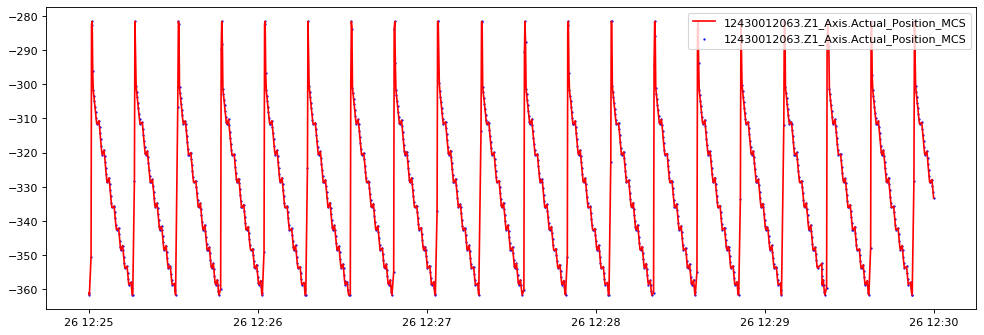

After: 
2019-11-26 12:17:50	-	2019-11-26 12:38:36


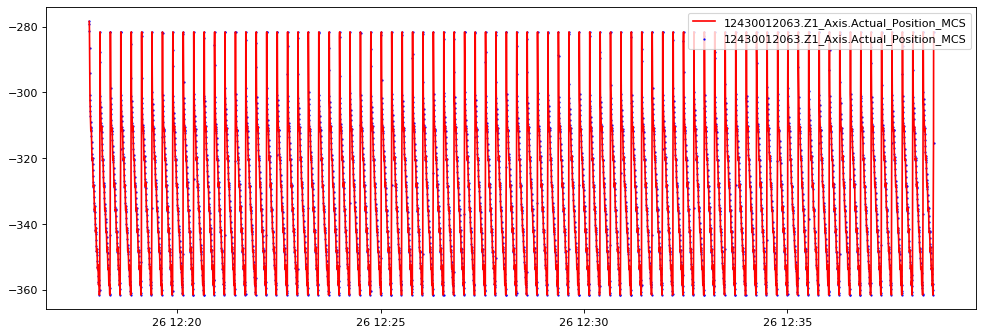

In [35]:
timeDeltas = [timedelta(minutes=5),timedelta(seconds=30),timedelta(seconds=5),timedelta(seconds=1)]
print("Before: ")
print(str(startSample)+"\t-\t"+str(endSample))
dfFindRange = dfAllEbene1.loc[lambda d: (startSample < d["timeStamp"]) & (d["timeStamp"] < endSample)]
plotActualZ1(dfFindRange)

start,end = approxRangeInSteps(dfAllEbene1,startSample,endSample,timeDeltas)
print("After: ")
print(str(start)+"\t-\t"+str(end))
dfFindRange = dfAllEbene1.loc[lambda d: (start < d['timeStamp']) & (d['timeStamp'] < end)]
plotActualZ1(dfFindRange)

In [36]:
df.head()

,_id,ValueID,value,timeStamp
0,5ddd16f38e15b3086c052889,12430012063.Energy_Savings.Active_Power_X1,24.362,2019-11-26 12:15:00.115
1,5ddd16f38e15b3086c05288b,12430012063.X1_Axis.Actual_Position_MCS,315.510,2019-11-26 12:15:00.139
2,5ddd16f38e15b3086c05288c,12430012063.Main_Spindle.MPC_Veff_Total,0.000,2019-11-26 12:15:00.142
3,5ddd16f38e15b3086c05288d,12430012063.Energy_Savings.Active_Power_Spindle1,38.350,2019-11-26 12:15:00.175
4,5ddd16f38e15b3086c05288e,12430012063.Main_Spindle.Actual_Power,0.000,2019-11-26 12:15:00.176


In [37]:
df_ncValues = pd.read_json("nc_values_02_12_19.json",orient="records", lines=True)

In [38]:
df_ncValues.head()

,_id,ValueID,value,min,value_number,subProgName,blockNo,toolNo,max,unit,programSet,timeStamp,machineID,channelID,progName,gCode,valueName
0,{'$oid': '5dc516828e15b329dc13414e'},12430012063.Channel1.Spindle_Override,100.000000,NaN,{'$numberInt': '100'},,,,NaN,NaN,NaN,{'$date': {'$numberLong': '1573197467176'}},12430012063,Channel1,,,NaN
1,{'$oid': '5dc5174e8e15b312b8a5d36a'},12430012063.Channel1.Spindle_Speed,2900.085449,NaN,{'$numberDouble': '2900.08544921875'},,N270,126.0,NaN,NaN,NaN,{'$date': {'$numberLong': '1573197718664'}},12430012063,Channel1,AIR_DMU65_WARMUP.MPF,,NaN
2,{'$oid': '5dc5174e8e15b312b8a5d377'},12430012063.Channel1.Feed_Axis,23923.825235,NaN,{'$numberDouble': '23923.8252346378'},,N270,126.0,NaN,NaN,NaN,{'$date': {'$numberLong': '1573197718882'}},12430012063,Channel1,AIR_DMU65_WARMUP.MPF,,NaN
3,{'$oid': '5dc5174e8e15b312b8a5d372'},12430012063.Channel1.Program_Feed,23923.825235,NaN,{'$numberDouble': '23923.8252346378'},,N270,126.0,NaN,NaN,NaN,{'$date': {'$numberLong': '1573197718883'}},12430012063,Channel1,AIR_DMU65_WARMUP.MPF,,NaN
4,{'$oid': '5dc5174e8e15b312b8a5d384'},12430012063.Channel1.Feed_Axis,0.000000,NaN,{'$numberInt': '0'},,N280,126.0,NaN,NaN,NaN,{'$date': {'$numberLong': '1573197719176'}},12430012063,Channel1,AIR_DMU65_WARMUP.MPF,,NaN


In [39]:
df_ncValues["toolNo"].value_counts()

126.0                    41222
MESSTASTER               21639
SF_D10_STAHL_SCHLICHT    18592
SF_D10_STAHL_SCHRUPP     15519
FASE_D10_STAHL           13147
MK_D63_STAHL_WNT         10209
SF_D12_ALU                9787
MK_D80_STAHL              8348
MK_D32_ALU                7262
5.0972102E9               6213
FS_D10_ALU                4652
BO_D4_ALU                 2551
SF_D5_STAHL_SCHRUPP       1758
SF_D5_ALU                 1635
SF_D5_STAHL_SCHLICHT      1534
SF_D12_STAHL              1529
BO_D10.2_ALU              1210
                          1091
SF_D12_STAHL_SCHLICHT      203
Name: toolNo, dtype: int64

In [40]:
df_ncValues.head(-1)

,_id,ValueID,value,min,value_number,subProgName,blockNo,toolNo,max,unit,programSet,timeStamp,machineID,channelID,progName,gCode,valueName
0,{'$oid': '5dc516828e15b329dc13414e'},12430012063.Channel1.Spindle_Override,100.000000,NaN,{'$numberInt': '100'},,,,NaN,NaN,NaN,{'$date': {'$numberLong': '1573197467176'}},12430012063,Channel1,,,NaN
1,{'$oid': '5dc5174e8e15b312b8a5d36a'},12430012063.Channel1.Spindle_Speed,2900.085449,NaN,{'$numberDouble': '2900.08544921875'},,N270,126.0,NaN,NaN,NaN,{'$date': {'$numberLong': '1573197718664'}},12430012063,Channel1,AIR_DMU65_WARMUP.MPF,,NaN
2,{'$oid': '5dc5174e8e15b312b8a5d377'},12430012063.Channel1.Feed_Axis,23923.825235,NaN,{'$numberDouble': '23923.8252346378'},,N270,126.0,NaN,NaN,NaN,{'$date': {'$numberLong': '1573197718882'}},12430012063,Channel1,AIR_DMU65_WARMUP.MPF,,NaN
3,{'$oid': '5dc5174e8e15b312b8a5d372'},12430012063.Channel1.Program_Feed,23923.825235,NaN,{'$numberDouble': '23923.8252346378'},,N270,126.0,NaN,NaN,NaN,{'$date': {'$numberLong': '1573197718883'}},12430012063,Channel1,AIR_DMU65_WARMUP.MPF,,NaN
4,{'$oid': '5dc5174e8e15b312b8a5d384'},12430012063.Channel1.Feed_Axis,0.000000,NaN,{'$numberInt': '0'},,N280,126.0,NaN,NaN,NaN,{'$date': {'$numberLong': '1573197719176'}},12430012063,Channel1,AIR_DMU65_WARMUP.MPF,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168095,{'$oid': '5dcc09d98e15b32a64410433'},12430012063.Channel1.Feed_Axis,2828.427125,NaN,{'$numberDouble': '2828.42712474619'},,,MESSTASTER,NaN,NaN,NaN,{'$date': {'$numberLong': '1573653021209'}},12430012063,Channel1,PLANFRAESEN_KONTUR.MPF,,NaN
168096,{'$oid': '5dcc09dc8e15b32a64410504'},12430012063.Channel1.Feed_Axis,2517.871355,NaN,{'$numberDouble': '2517.87135493456'},,,MESSTASTER,NaN,NaN,NaN,{'$date': {'$numberLong': '1573653023789'}},12430012063,Channel1,PLANFRAESEN_KONTUR.MPF,,NaN
168097,{'$oid': '5dcc09dc8e15b32a6441050d'},12430012063.Channel1.Feed_Axis,2000.096050,NaN,{'$numberDouble': '2000.09604978977'},,,MESSTASTER,NaN,NaN,NaN,{'$date': {'$numberLong': '1573653023900'}},12430012063,Channel1,PLANFRAESEN_KONTUR.MPF,,NaN
168098,{'$oid': '5dcc09dc8e15b32a64410516'},12430012063.Channel1.Feed_Axis,2000.000000,NaN,{'$numberInt': '2000'},,,MESSTASTER,NaN,NaN,NaN,{'$date': {'$numberLong': '1573653023922'}},12430012063,Channel1,PLANFRAESEN_KONTUR.MPF,,NaN


In [42]:
df_ncValues["progName"].value_counts()

TESTPROGRAMM.MPF                68991
AIR_DMU65_WARMUP.MPF            41162
SETUP1.mpf                      15200
SETUP2.mpf                      11143
PLANFRAESEN_KONTUR.MPF           9284
EINZELLOCH.MPF                   7761
5097210200_BES_VOLL_T180.MPF     5359
_N_MA_JOG_STEP1_MPF              3914
_N_OSTORE1_SYF                   1917
_N_BLMEAS_SPF                     916
_N_USERSTARTPROG_SPF              400
_N_BLASONOFF_SPF                  357
_N_BPOS1AX_SPF                    338
_N_BAX2STARTEND_SPF               290
WZG_MESSEN_L.MPF                  255
_N_L_TOL_SPF                      245
WZG_MESSEN_L_R.MPF                224
                                  153
_N_ASUP1_SYF                       72
_N_USERENDPROG_SPF                 56
_N_ASUP2_SYF                       33
_N_BSPFUNC_SPF                     22
_N_BTOOLDATA_SPF                    4
_N_BL9903_SPF                       3
_N_BL9902_SPF                       2
Name: progName, dtype: int64